# Рубежный контроль №1

**Лясковский Максим Альбертович**, группа ИУ5-24М.Вариант №1, набор данных №8.

## Задание
Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
# Загружаем датасет
data = pd.read_csv('data/googleplaystore.csv')

In [3]:
# Первые 5 строк датасета
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# размер набора данных
data.shape

(10841, 13)

In [5]:
# типы колонок
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
data['Price'] = data['Price'].replace('[\$]', '', regex=True).replace('Everyone', '0').astype(np.float64)

In [7]:
data['Size'] = data['Size'] \
    .replace('[M]', '000000', regex=True) \
    .replace('[k]', '000', regex=True) \
    .replace('[.]', '', regex=True) \
    .replace('[,]', '', regex=True) \
    .replace('[+]', '', regex=True) \
    .replace('^[A-z,. ]*$', np.NaN, regex=True) \
    .astype(np.float64)

data['Reviews'] = data['Reviews'] \
    .replace('[M]', '000000', regex=True) \
    .replace('[k]', '000', regex=True) \
    .replace('[.]', '', regex=True) \
    .replace('[,]', '', regex=True) \
    .replace('[+]', '', regex=True) \
    .replace('^[A-z,. ]*$', np.NaN, regex=True) \
    .astype(np.float64)

data['Price'] = data['Price'] \
    .replace('[M]', '000000', regex=True) \
    .replace('[k]', '000', regex=True) \
    .replace('[.]', '', regex=True) \
    .replace('[,]', '', regex=True) \
    .replace('[+]', '', regex=True) \
    .replace('[$]', '', regex=True) \
    .replace('^[A-z,. ]*$', np.NaN, regex=True) \
    .astype(np.float64)

data['Rating'] = data['Rating'].astype(np.float64)

In [8]:
for t in data.dtypes.keys():
    if data.dtypes[t] == 'object':
        data[t] = data[t].astype('category')
        data[t] = data[t].cat.codes

In [9]:
# типы колонок
data.dtypes

App                 int16
Category             int8
Rating            float64
Reviews           float64
Size              float64
Installs             int8
Type                 int8
Price             float64
Content Rating       int8
Genres               int8
Last Updated        int16
Current Ver         int16
Android Ver          int8
dtype: object

In [10]:
# Первые 5 строк датасета
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,6963,1,4.1,159.0,19000000.0,7,1,0.0,1,9,561,118,15
1,2632,1,3.9,967.0,14000000.0,19,1,0.0,1,12,481,1018,15
2,8657,1,4.7,87510.0,87000000.0,14,1,0.0,1,9,116,464,15
3,7828,1,4.5,215644.0,25000000.0,17,1,0.0,4,9,824,2765,18
4,7023,1,4.3,967.0,28000000.0,10,1,0.0,1,11,756,277,20


In [11]:
# проверим есть ли пропущенные значения
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [12]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((10841, 13), (10841, 11))

In [13]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((10841, 13), (7730, 13))

In [14]:
data.corr()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,1.000000,0.019396,0.036576,0.035164,0.039975,0.024628,0.008603,0.011932,0.054218,0.019800,-0.045544,0.079197,0.092633
Category,0.019396,1.000000,-0.039488,0.000185,-0.065011,0.002577,0.019406,-0.011926,-0.092601,0.791484,-0.029542,0.098662,0.097827
Rating,0.036576,-0.039488,1.000000,0.092477,0.040909,0.019105,0.025518,-0.021176,0.011881,-0.045489,-0.077713,0.050986,0.063803
Reviews,0.035164,0.000185,0.092477,1.000000,0.123581,0.047677,-0.045039,-0.009682,0.067346,-0.011145,-0.060585,0.116246,0.122904
Size,0.039975,-0.065011,0.040909,0.123581,1.000000,0.025156,-0.041273,-0.010724,0.071396,-0.058003,-0.006865,0.044831,0.082154
Installs,0.024628,0.002577,0.019105,0.047677,0.025156,1.000000,-0.052111,-0.030705,0.026655,-0.005152,0.006460,0.040831,0.031705
Type,0.008603,0.019406,0.025518,-0.045039,-0.041273,-0.052111,1.000000,0.227435,-0.049414,-0.001277,0.018085,-0.073285,-0.104620
Price,0.011932,-0.011926,-0.021176,-0.009682,-0.010724,-0.030705,0.227435,1.000000,-0.016177,-0.003591,0.012888,-0.032788,-0.013561
Content Rating,0.054218,-0.092601,0.011881,0.067346,0.071396,0.026655,-0.049414,-0.016177,1.000000,-0.128208,-0.035716,0.023029,0.023238
Genres,0.019800,0.791484,-0.045489,-0.011145,-0.058003,-0.005152,-0.001277,-0.003591,-0.128208,1.000000,-0.037719,0.099614,0.104260


In [15]:
# %config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [24]:
corr = data.corr()
corr = corr[(corr>0.5) & (corr != 1.)]

In [30]:
corr = corr.dropna(axis=1, how='all')

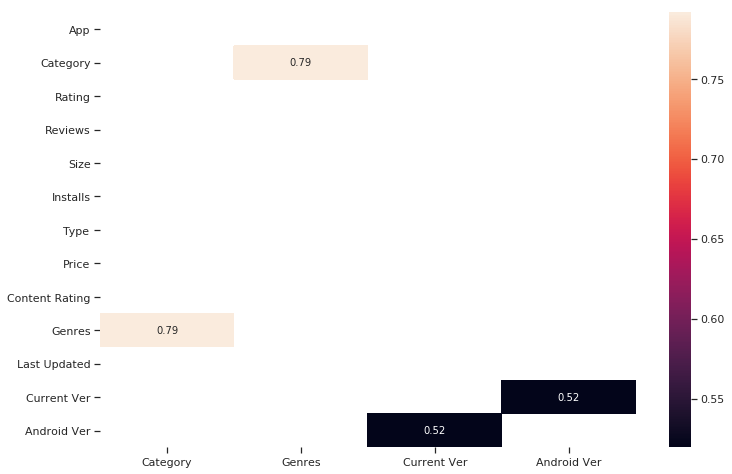

In [31]:
sns.heatmap(data=corr, annot=True, fmt='.2f');

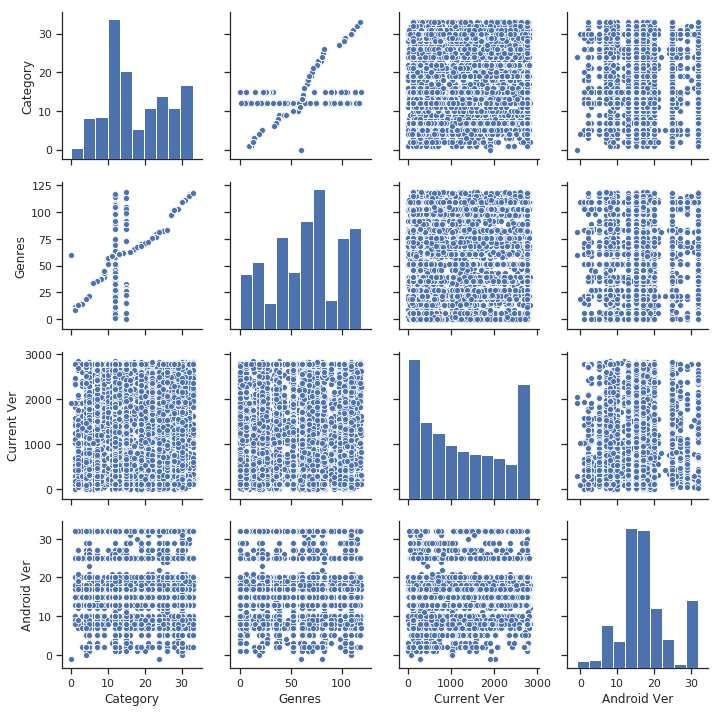

In [33]:
sns.pairplot(data[corr.columns]) # .sample(n=100, random_state=42)

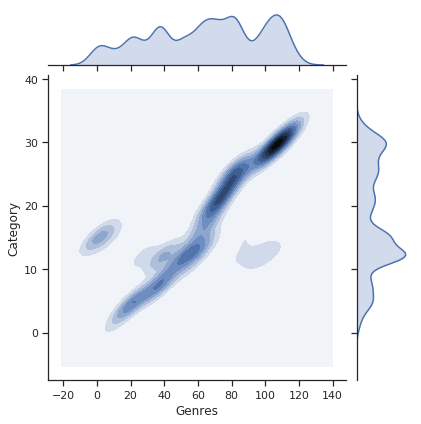

In [20]:
sns.jointplot(data=data, x='Genres', y='Category', kind='kde')

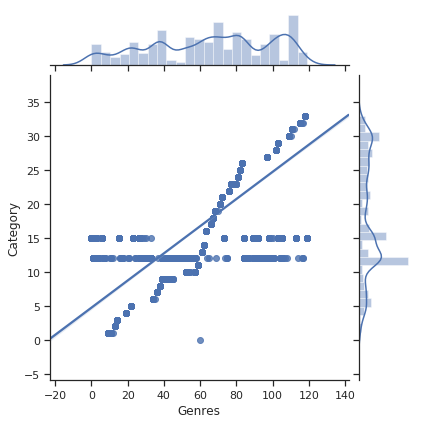

In [21]:
sns.jointplot(data=data, x='Genres', y='Category', kind='reg')